In [2]:
#importing the necessaryb libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import ylim, title, ylabel, xlabel


In [3]:
#implementing the moving average class
class MovingAverageFilter(object):
    
    def __init__(self, window):
        self.window = window
        self.data = []
        
    def step(self, measurement):
        self.data.append(measurement)
        if len(self.data) > self.window:
            self.data.pop(0)
            
    def current_state(self):
        return sum(self.data)/ len(self.data)

In [4]:
#implementing the Kalman class
class SingleStateKalmanFilter(object):
    
    def __init__(self, A, B, C, x, P, Q, R):
        self.A = A
        self.B = B
        self.C = C
        self.current_state_estimate = x
        self.current_prob_estimate = P
        self.Q = Q
        self.R = R
        
    def current_state(self):
        return self.current_state_estimate
    
    def step(self, control_input, measurement):
        
        #predicted step
        predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_input
        predicted_prob_estimate = (self.A * self.current_prob_estimate) * self.A + self.Q
        
        #observation step
        innovation = measurement - self.C * predicted_state_estimate
        innovation_covariance = self.C * predicted_prob_estimate * self.C + self.B
        
        #update step
        kalman_gain = predicted_prob_estimate * self.C * 1 /float(innovation_covariance)
        self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
        
        #eye(n) nxn identity matrix
        self.current_prob_estimate = (1 - kalman_gain * self.C) * predicted_prob_estimate
        

In [5]:
hurricane_data = pd.read_csv("hurricanes.csv")

In [6]:
hurricane_data

,tid,sid,latitude,longitude,time,wind,label
0,1374,1,28.4,-67.0,2005-09-05 18:00:00,30,LOW_INTENSITY
1,1374,1,28.4,-66.6,2005-09-06 00:00:00,35,LOW_INTENSITY
2,1374,1,28.5,-66.5,2005-09-06 06:00:00,40,LOW_INTENSITY
3,1374,1,28.5,-66.5,2005-09-06 12:00:00,50,LOW_INTENSITY
4,1374,1,28.6,-66.4,2005-09-06 18:00:00,50,LOW_INTENSITY
...,...,...,...,...,...,...,...
1985,1475,3,20.9,-87.1,2011-10-28 06:00:00,50,LOW_INTENSITY
1986,1475,3,21.4,-86.9,2011-10-28 12:00:00,40,LOW_INTENSITY
1987,1475,3,21.7,-86.4,2011-10-28 18:00:00,25,LOW_INTENSITY
1988,1475,3,21.8,-85.3,2011-10-29 00:00:00,20,LOW_INTENSITY


In [7]:
hurricane_data.drop_duplicates(subset=["longitude", "latitude", "time"], inplace=True, )

In [9]:
#TODO => Form the base dataset and understand the structure
#TODO => implement the moving average class and test with window 5, 20 and 30
#TODO => Find the various lengths of the 5, 20, 20 window
#TODO => Implement the Kalman class
#TODO => Try both their demonstrations

In [10]:
#setting up the structure of the data that
longitudes = np.array(hurricane_data['longitude'])
latitudes = np.array(hurricane_data['latitude'])

len(longitudes) == len(latitudes), len(latitudes)

(True, 1990)

Text(0.5, 1.0, 'Plotting the distribution of the longitude')

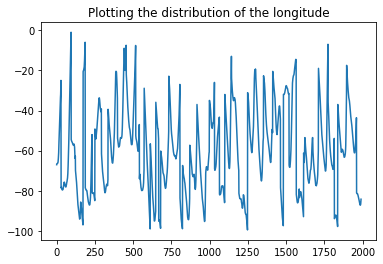

In [13]:
#plot the latitude 
plt.plot(longitudes)
title("Plotting the distribution of the longitude")


Text(0.5, 1.0, 'Plotting the distruibution of the Latitude')

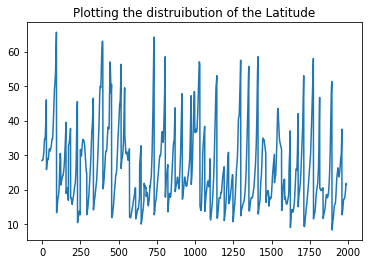

In [14]:
plt.plot(latitudes)
title("Plotting the distruibution of the Latitude")

In [11]:
#implementing the moving average across 5, 20, 30

#initializing the lists
moving_average_latitude_5 = []
moving_average_latitude_20 = []
moving_average_latitude_30 = []

moving_average_longitude_5 = []
moving_average_longitude_20 = []
moving_average_longitude_30 = []

#initializing the moving average classes
moving_5 = MovingAverageFilter(5)
moving_20 = MovingAverageFilter(20)
moving_30 = MovingAverageFilter(30)

#implemeting moving average on the latitude
for latitude in latitudes:
    
    moving_5.step(latitude)
    moving_20.step(latitude)
    moving_30.step(latitude)
    
    moving_average_latitude_5.append(moving_5.current_state())
    moving_average_latitude_20.append(moving_20.current_state())
    moving_average_latitude_30.append(moving_30.current_state())
    
#implementing moving average on the longitude
for longitude in longitudes:
    
    moving_5.step(longitude)
    moving_20.step(longitude)
    moving_30.step(longitude)
    
    moving_average_longitude_5.append(moving_5.current_state())
    moving_average_longitude_20.append(moving_20.current_state())
    moving_average_longitude_30.append(moving_30.current_state())
    
#test that the values are equal in length and they equal 1990
len(moving_average_latitude_5) == len(moving_average_latitude_20) == len(moving_average_latitude_30) == 1990

True

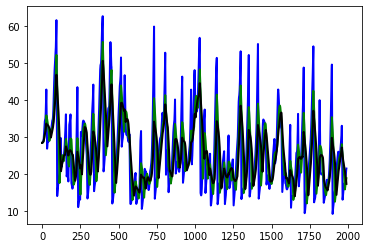

In [15]:
#plotting the distruibution of the latitudes across all the windows of the moving average
plt.plot(moving_average_latitude_5, 'b', linewidth=2.0) #purple
plt.plot(moving_average_latitude_20, 'g', linewidth=2.0) #green
plt.plot(moving_average_latitude_30, 'k', linewidth=2.0) #black

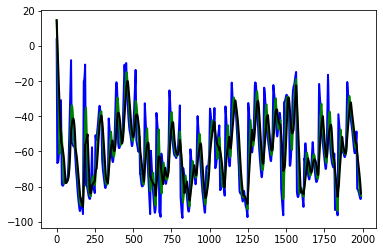

In [16]:
#plotting the distruibution of the longitudes across all the windows of the moving average
plt.plot(moving_average_longitude_5, 'b', linewidth=2.0) #purple
plt.plot(moving_average_longitude_20, 'g', linewidth=2.0) #green
plt.plot(moving_average_longitude_30, 'k', linewidth=2.0) #black

In [17]:
#finding the mean of the latitude and longitude
latitude_mean = np.mean(latitudes)
longitude_mean = np.mean(longitudes)

latitude_mean, longitude_mean

(25.909095477386934, -60.12482412060302)

In [18]:
#Now to implement kalman filter
latitude_kalman_estimate = []

A = 1 #no process innovation
C = 1 #Measurement
B = 0 #No control input
Q = 0.005 #Process covariance
R = 1 #Measurement covariance
x = 25.9 #Initial estimate
P = 1

latitude_kalman = SingleStateKalmanFilter(A, B, C, x, P, Q, R)

for latitude in latitudes:
    latitude_kalman.step(0, latitude)
    latitude_kalman_estimate.append(latitude_kalman.current_state())

In [19]:
#Now to implement kalman filter on longitude
longitude_kalman_estimate = []

A = 1 #no process innovation
C = 1 #Measurement
B = 0 #No control input
Q = 0.005 #Process covariance
R = 1 #Measurement covariance
x = 25.9 #Initial estimate
P = 1

longitude_kalman = SingleStateKalmanFilter(A, B, C, x, P, Q, R)

for longitude in longitudes:
    longitude_kalman.step(0, longitude)
    longitude_kalman_estimate.append(longitude_kalman.current_state())

In [21]:
#DEbugging and plotting
len(latitude_kalman_estimate) == len(longitude_kalman_estimate) == 1990

True

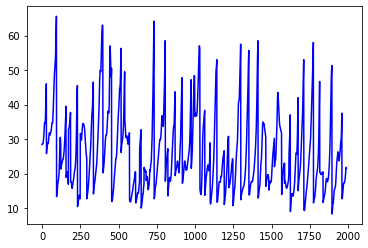

In [25]:
plt.plot(latitude, 'r')
plt.plot(latitude_kalman_estimate, 'b')

In [ ]:
plt.plot(latitude, 'r')
plt.plot(latitude_kalman_estimate, 'b')